# Perceptron 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


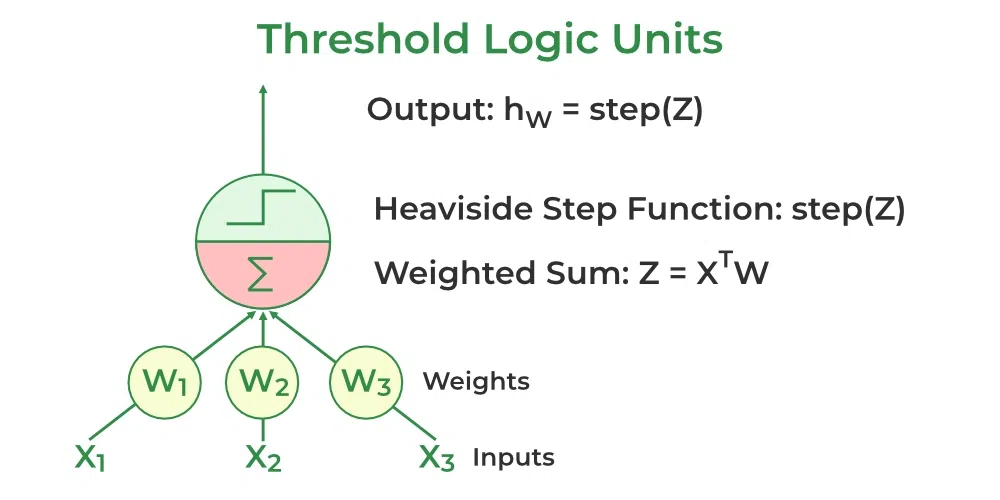

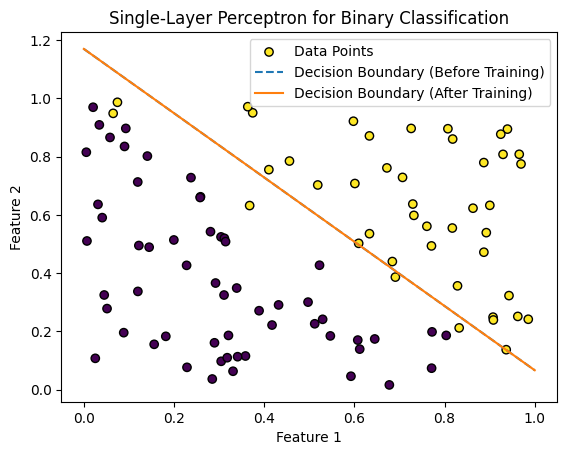

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random linearly separable data
np.random.seed(42)
X = np.random.rand(100, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)

# Define the perceptron class
class Perceptron:
    def __init__(self, input_size):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()

    def predict(self, inputs):
        linear_output = np.dot(inputs, self.weights) + self.bias
        return np.where(linear_output > 0, 1, 0)

    def train(self, inputs, targets, learning_rate=0.1, epochs=100):
        for epoch in range(epochs):
            for i in range(len(inputs)):
                prediction = self.predict(inputs[i])
                error = targets[i] - prediction
                self.weights += learning_rate * error * inputs[i]
                self.bias += learning_rate * error

# Initialize and train the perceptron
perceptron = Perceptron(input_size=2)
perceptron.train(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o', label='Data Points')

# Plot the decision boundary before training
x_vals = np.linspace(0, 1, 100)
y_vals_before = (-perceptron.weights[0] * x_vals - perceptron.bias) / perceptron.weights[1]
plt.plot(x_vals, y_vals_before, '--', label='Decision Boundary (Before Training)')

# Plot the decision boundary after training
y_vals_after = (-perceptron.weights[0] * x_vals - perceptron.bias) / perceptron.weights[1]
plt.plot(x_vals, y_vals_after, label='Decision Boundary (After Training)')

plt.title('Single-Layer Perceptron for Binary Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Generate random linearly separable data
np.random.seed(42)
X = np.random.rand(100, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)

# Build the multi-layer perceptron (MLP) model
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_dim=2))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=100, verbose=0)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o', label='Data Points')

# Plot the decision boundary before training
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], colors='r', linestyles='--', label='Decision Boundary (Before Training)')

plt.title('Multi-Layer Perceptron for Binary Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
